# Exploración de Datos

## Librerías

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gc

In [5]:
pd.options.display.float_format = '{:.3f}'.format

## Introducción

Clara nos dio el dataset de las ecobicis, quiere que seamos creativos para resolver problemas con los datos como Científicos de Datos.

* Promedio de la duración.
* Horas "pico"
* Calculo de distancias
* Problema: Proyección de población de bicicleta.
* Problema: Oferta / Demanda
* Problema: Mantenimiento
* Problema: Marketing
* Problema: Logística / Rutas

## Lectura de insumos

In [6]:
ruta = '../data/ecobici/'
cat_estacion = pd.read_csv(ruta + 'estaciones-de-ecobici.csv')
cat_estacion.head()

,ID,Nombre,Dirección,Número,Código postal,districtCode,Colonia,altitude,nearbyStations/0,location/lat,location/lon,Tipo de estación,nearbyStations/1,nearbyStations/2,nearbyStations/3,nearbyStations/4,nearbyStations/5,punto_geo
0,416,416 RECREO-PARROQUÍA,416 - Recreo-Parroquía,S/N,3104.000,1,Ampliación Granada,NaN,390,19.371,-99.178,BIKE,391.000,415.000,NaN,NaN,NaN,"19.371308,-99.177607"
1,440,440 REAL DE MAYORAZGO-PUENTE XOCO,440 - Real De Mayorazgo-Puente Xoco,S/N,3330.000,1,Ampliación Granada,NaN,433,19.361,-99.169,BIKE,439.000,441.000,NaN,NaN,NaN,"19.36065,-99.168669"
2,70,70 PARQUE MEXICO-MICHOACAN,070 - Parque México - Michoacan,S/N,6100.000,1,Ampliación Granada,NaN,69,19.411,-99.170,"BIKE,TPV",71.000,76.000,NaN,NaN,NaN,"19.411272,-99.169718"
3,325,325 PROVIDENCIA -AVENIDA DEL VALLE,325 - Providencia -Avenida Del Valle,S/N,3100.000,1,Ampliación Granada,NaN,316,19.388,-99.170,BIKE,335.000,336.000,NaN,NaN,NaN,"19.3881779,-99.1696894"
4,252,252 VICTOR HUGO-SHAKESPEARE,252 - Víctor Hugo-Shakespeare,S/N,11510.000,2,Anzures,NaN,249,19.428,-99.177,BIKE,251.000,253.000,NaN,NaN,NaN,"19.427575,-99.17702"


In [7]:
# lista de los archivos en ruta
lst_f = os.listdir(ruta)

# todos los archivos en ruta que inician que no sea 'estaciones-de-ecobici.csv'
lst_f = [f for f in lst_f if f != 'estaciones-de-ecobici.csv']

print("Total de archivos", len(lst_f))

Total de archivos 25


In [8]:
# Lectura de los archivos
lst_df = []

for f in range(len(lst_f)):
    print("Leyendo archivo", f + 1, "de", len(lst_f))
    lst_df.append(pd.read_csv(ruta + lst_f[f]))

Leyendo archivo 1 de 25
Leyendo archivo 2 de 25
Leyendo archivo 3 de 25
Leyendo archivo 4 de 25
Leyendo archivo 5 de 25
Leyendo archivo 6 de 25
Leyendo archivo 7 de 25
Leyendo archivo 8 de 25
Leyendo archivo 9 de 25
Leyendo archivo 10 de 25
Leyendo archivo 11 de 25
Leyendo archivo 12 de 25
Leyendo archivo 13 de 25
Leyendo archivo 14 de 25
Leyendo archivo 15 de 25
Leyendo archivo 16 de 25
Leyendo archivo 17 de 25
Leyendo archivo 18 de 25
Leyendo archivo 19 de 25
Leyendo archivo 20 de 25
Leyendo archivo 21 de 25
Leyendo archivo 22 de 25
Leyendo archivo 23 de 25
Leyendo archivo 24 de 25
Leyendo archivo 25 de 25


In [9]:
# Concatenar todos los archivos
df_viajes = pd.concat(lst_df, axis=0)
df_viajes.head() # 5 primeros registros

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,Fecha_Arribo
0,M,29.000,5210661,134,30/09/2023,23:55:54,147,01/10/2023,00:00:16,NaN
1,M,26.000,8316747,045,30/09/2023,23:46:57,147,01/10/2023,00:00:32,NaN
2,M,30.000,3749272,384,30/09/2023,23:50:50,337,01/10/2023,00:00:34,NaN
3,F,40.000,2961233,014,30/09/2023,23:50:24,018,01/10/2023,00:00:36,NaN
4,F,34.000,2661924,155,30/09/2023,23:55:48,139,01/10/2023,00:00:39,NaN


In [10]:
df_viajes.tail() # 5 últimos registros

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,Fecha_Arribo
1829758,F,30.000,8441289,536,31/03/2024,23:33:51,536,31/03/2024,23:59:28,NaN
1829759,F,31.000,2991446,543,31/03/2024,23:41:08,257,31/03/2024,23:59:39,NaN
1829760,M,28.000,4665949,217,31/03/2024,23:34:00,217,31/03/2024,23:59:41,NaN
1829761,M,22.000,6748404,222,31/03/2024,23:26:00,017,31/03/2024,23:59:44,NaN
1829762,F,25.000,2719672,222,31/03/2024,23:24:36,017,31/03/2024,23:59:48,NaN


In [11]:
# Características del dataset
print("Número de registros:", df_viajes.shape[0])
print("Número de columnas:", df_viajes.shape[1])

Número de registros: 35145813
Número de columnas: 10


In [12]:
# Eliminar y liberar memoria de los dataframes en la lista
for df in lst_df:
    del df

gc.collect()

0

## Inspección / Exploración

Situaciones con el dataset:
- Existen dos columnas similares en el nombre: 'Fecha Arribo' y 'Fecha_Arribo', las cuales parecen ser la misma columna. Al ser una cadena que tiene como diferencia el simbolo ' ' por '_', la libreria la esta considerando como dos columnas diferentes.

In [13]:
# Información general
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35145813 entries, 0 to 1829762
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha Arribo           object 
 8   Hora_Arribo            object 
 9   Fecha_Arribo           object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ GB


In [14]:
# Tipos de datos
df_viajes.dtypes

Genero_Usuario            object
Edad_Usuario             float64
Bici                       int64
Ciclo_Estacion_Retiro     object
Fecha_Retiro              object
Hora_Retiro               object
Ciclo_EstacionArribo      object
Fecha Arribo              object
Hora_Arribo               object
Fecha_Arribo              object
dtype: object

In [15]:
# Tipos de datos por columna
for c in df_viajes.columns:
    print(c, df_viajes[c].map(type).unique().tolist())

Genero_Usuario [<class 'str'>, <class 'float'>]
Edad_Usuario [<class 'float'>]
Bici [<class 'int'>]
Ciclo_Estacion_Retiro [<class 'str'>]
Fecha_Retiro [<class 'str'>]
Hora_Retiro [<class 'str'>]
Ciclo_EstacionArribo [<class 'str'>]
Fecha Arribo [<class 'str'>, <class 'float'>]
Hora_Arribo [<class 'str'>]
Fecha_Arribo [<class 'float'>, <class 'str'>]


In [16]:
# Unimos las columnas 'Fecha Arribo' y 'Fecha_Arribo' en una sola columna
df_viajes['Fecha_Arribo'] = df_viajes['Fecha Arribo'].combine_first(df_viajes['Fecha_Arribo'])
df_viajes.drop(columns=['Fecha Arribo'], inplace=True)
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Hora_Arribo,Fecha_Arribo
0,M,29.000,5210661,134,30/09/2023,23:55:54,147,00:00:16,01/10/2023
1,M,26.000,8316747,045,30/09/2023,23:46:57,147,00:00:32,01/10/2023
2,M,30.000,3749272,384,30/09/2023,23:50:50,337,00:00:34,01/10/2023
3,F,40.000,2961233,014,30/09/2023,23:50:24,018,00:00:36,01/10/2023
4,F,34.000,2661924,155,30/09/2023,23:55:48,139,00:00:39,01/10/2023


In [17]:
# Filas con valores nulos
df_viajes.isnull().sum()

Genero_Usuario           237
Edad_Usuario             987
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Hora_Arribo                0
Fecha_Arribo               0
dtype: int64

In [18]:
# Revisamos filas con valores nulos en la columna 'Genero_Usuario'
df_viajes[df_viajes['Genero_Usuario'].isnull()]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Hora_Arribo,Fecha_Arribo
1034265,NaN,NaN,3865789,180,24/10/2023,12:30:33,164,12:38:47,24/10/2023
1306491,NaN,NaN,6124788,439,30/10/2023,10:17:22,417,10:25:19,30/10/2023
106262,NaN,NaN,5254487,495,02/11/2024,21:35:04,183,21:41:27,02/11/2024
106306,NaN,NaN,7889702,495,02/11/2024,21:35:56,001,21:43:01,02/11/2024
487288,NaN,NaN,2393593,374,08/11/2024,11:28:33,377,11:32:03,08/11/2024
...,...,...,...,...,...,...,...,...,...
41199,NaN,NaN,6283576,119,01/03/2024,16:08:59,182,16:27:00,01/03/2024
720192,NaN,NaN,4540696,477,12/03/2024,17:19:23,080,17:38:02,12/03/2024
1294938,NaN,NaN,7410467,064,21/03/2024,19:08:01,447,19:18:39,21/03/2024
1296288,NaN,NaN,2626240,064,21/03/2024,19:06:58,480,19:30:24,21/03/2024


In [19]:
# Tamaño del dataset
print("Número de registros:", df_viajes.shape[0])
print("Número de columnas:", df_viajes.shape[1])

Número de registros: 35145813
Número de columnas: 9


In [20]:
# Eliminar filas de la columna 'Genero_Usuario' que tengan valores nulos
df_viajes = df_viajes[df_viajes['Genero_Usuario'].notnull()] 

In [21]:
# Tamaño del dataset
print("Número de registros:", df_viajes.shape[0])
print("Número de columnas:", df_viajes.shape[1])

Número de registros: 35145576
Número de columnas: 9


In [22]:
# Numero de registros eliminados
print("Registros eliminados:", 35145813 - 35145576)

Registros eliminados: 237


In [23]:
# Filas con valores nulos
df_viajes.isnull().sum()

Genero_Usuario             0
Edad_Usuario             750
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Hora_Arribo                0
Fecha_Arribo               0
dtype: int64

In [24]:
# Eliminar filas con valores nulos en las columnas 'Edad_Usuario'
df_viajes = df_viajes[df_viajes['Edad_Usuario'].notnull()]

In [25]:
# Tamaño del dataset
print("Número de registros:", df_viajes.shape[0])
print("Número de columnas:", df_viajes.shape[1])

Número de registros: 35144826
Número de columnas: 9


In [26]:
# Numero de registros eliminados
print("Registros eliminados:", 35145576 - 35144826)

Registros eliminados: 750


In [27]:
# Filas con valores nulos
df_viajes.isnull().sum()

Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_EstacionArribo     0
Hora_Arribo              0
Fecha_Arribo             0
dtype: int64

In [28]:
# Tipo de datos por columna
for c in df_viajes.columns:
    print(c, df_viajes[c].map(type).unique().tolist())

Genero_Usuario [<class 'str'>]
Edad_Usuario [<class 'float'>]
Bici [<class 'int'>]
Ciclo_Estacion_Retiro [<class 'str'>]
Fecha_Retiro [<class 'str'>]
Hora_Retiro [<class 'str'>]
Ciclo_EstacionArribo [<class 'str'>]
Hora_Arribo [<class 'str'>]
Fecha_Arribo [<class 'str'>]


In [29]:
# Optimizar el uso de memoria ajustando el tipo de dato de las columnas de  64 bits a 32 bits
df_viajes['Bici'] = df_viajes['Bici'].astype(np.int32)

No se puede realizar el ajuste de la columna 'Ciclo_Estacion_Retiro' por un valor que no puede ser transformado a numero, ya que cuenta con un guion entre los numeros

In [30]:
# Buscamos el registro en la columna 'Ciclo_Estacion_Retiro' con el valor '107-108'
df_viajes[df_viajes['Ciclo_Estacion_Retiro'] == '107-108']

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Hora_Arribo,Fecha_Arribo
10,O,31.000,7546344,107-108,30/09/2023,23:30:58,102,00:01:11,01/10/2023
422,M,51.000,2918365,107-108,01/10/2023,05:37:27,018,05:49:08,01/10/2023
709,M,40.000,2222826,107-108,01/10/2023,07:02:42,026,07:08:17,01/10/2023
840,M,45.000,7535610,107-108,01/10/2023,07:26:06,121,07:31:42,01/10/2023
980,M,32.000,3623840,107-108,01/10/2023,07:44:01,113,07:49:04,01/10/2023
...,...,...,...,...,...,...,...,...,...
1827527,M,34.000,5720545,107-108,31/03/2024,21:38:38,112,21:43:34,31/03/2024
1827779,M,32.000,2080414,107-108,31/03/2024,21:38:13,584,21:53:39,31/03/2024
1828369,M,38.000,2561918,107-108,31/03/2024,22:04:50,482,22:21:44,31/03/2024
1828384,M,42.000,8886426,107-108,31/03/2024,22:13:58,102,22:22:09,31/03/2024


In [31]:
# Valores distintos en la columna 'Ciclo_Estacion_Retiro'
df_viajes['Ciclo_Estacion_Retiro'].unique()

array(['134', '045', '384', '014', '155', '063', '075', '304', '032',
       '107-108', '604', '081', '025', '029', '043', '228', '038', '366',
       '414', '111', '068', '123', '168', '261', '420', '354', '356',
       '554', '058', '409', '139', '079', '145', '314', '246', '242',
       '615', '117', '054', '349', '030', '374', '137', '064', '456',
       '318', '140', '048', '219', '142', '078', '288', '052', '004',
       '154', '136', '047', '589', '340', '005', '041', '141', '270',
       '074', '233', '182', '059', '110', '185', '008', '659', '465',
       '700', '119', '126', '100', '044', '118', '597', '221', '099',
       '055', '087', '389', '553', '237-238', '564', '365', '026', '317',
       '167', '012', '543', '144', '449', '545', '010', '469', '546',
       '129', '429', '171', '397', '102', '301', '308', '321', '069',
       '225', '065', '135', '303', '208', '080', '056', '009', '178',
       '019', '398', '696', '271-272', '089', '617', '611', '540', '164',
       '

In [32]:
# Valores distintos en la columna 'Edad_Usuario'
df_viajes['Edad_Usuario'].unique()

array([ 29.,  26.,  30.,  40.,  34.,  39.,  23.,  24.,  27.,  31.,  43.,
        41.,  35.,  28.,  53.,  48.,  32.,  22.,  19.,  33.,  46.,  38.,
        36.,  25.,  55.,  44.,  42.,  58.,  45.,  49.,  37.,  21.,  75.,
        56.,  50.,  18.,  54.,  20.,  73.,  60.,  64.,  17.,  59.,  57.,
        47.,  51.,  65.,  67.,  52.,  66.,  62.,  63.,  61.,  68.,  72.,
        69.,  82.,  70.,  78.,  71.,  79.,  77.,  76.,  16.,  74.,  80.,
        84.,  97.,  83.,  88.,  81., 100.,  90., 123., 102.,  98.,  85.,
        99.,  91.,  95.,  89.,  94.,  96., 101., 151.,  86., 115., 124.,
       160., 137.,  87., 152., 145., 119., 104., 122., 110.])

In [33]:
# Convertir la columna 'Edad_Usuario' a tipo de dato entero de 32 bits
df_viajes['Edad_Usuario'] = df_viajes['Edad_Usuario'].astype(np.int32)

In [34]:
# Valores distintos en la columna 'Edad_Usuario'
df_viajes['Edad_Usuario'].unique()

array([ 29,  26,  30,  40,  34,  39,  23,  24,  27,  31,  43,  41,  35,
        28,  53,  48,  32,  22,  19,  33,  46,  38,  36,  25,  55,  44,
        42,  58,  45,  49,  37,  21,  75,  56,  50,  18,  54,  20,  73,
        60,  64,  17,  59,  57,  47,  51,  65,  67,  52,  66,  62,  63,
        61,  68,  72,  69,  82,  70,  78,  71,  79,  77,  76,  16,  74,
        80,  84,  97,  83,  88,  81, 100,  90, 123, 102,  98,  85,  99,
        91,  95,  89,  94,  96, 101, 151,  86, 115, 124, 160, 137,  87,
       152, 145, 119, 104, 122, 110], dtype=int32)

In [35]:
# Tamaño del dataset
print("Número de registros:", df_viajes.shape[0])
print("Número de columnas:", df_viajes.shape[1])

Número de registros: 35144826
Número de columnas: 9


In [36]:
# Vista del dataset
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Hora_Arribo,Fecha_Arribo
0,M,29,5210661,134,30/09/2023,23:55:54,147,00:00:16,01/10/2023
1,M,26,8316747,045,30/09/2023,23:46:57,147,00:00:32,01/10/2023
2,M,30,3749272,384,30/09/2023,23:50:50,337,00:00:34,01/10/2023
3,F,40,2961233,014,30/09/2023,23:50:24,018,00:00:36,01/10/2023
4,F,34,2661924,155,30/09/2023,23:55:48,139,00:00:39,01/10/2023


In [37]:
# Transformar la columna 'Fecha_Arribo' a tipo de dato datetime
df_viajes['fh_retiro'] = pd.to_datetime(df_viajes['Fecha_Retiro'].map( lambda x: x[-4:]+'-'+x[3:5]+'-'+x[:2] ) +' ' + df_viajes['Hora_Retiro'].map( lambda x: x ) , errors='coerce')
df_viajes['fh_arribo'] = pd.to_datetime(df_viajes['Fecha_Arribo'].map( lambda x: x[-4:]+'-'+x[3:5]+'-'+x[:2] ) +' ' + df_viajes['Hora_Arribo'].map( lambda x: x ) , errors='coerce')

In [38]:
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Hora_Arribo,Fecha_Arribo,fh_retiro,fh_arribo
0,M,29,5210661,134,30/09/2023,23:55:54,147,00:00:16,01/10/2023,2023-09-30 23:55:54,2023-10-01 00:00:16
1,M,26,8316747,045,30/09/2023,23:46:57,147,00:00:32,01/10/2023,2023-09-30 23:46:57,2023-10-01 00:00:32
2,M,30,3749272,384,30/09/2023,23:50:50,337,00:00:34,01/10/2023,2023-09-30 23:50:50,2023-10-01 00:00:34
3,F,40,2961233,014,30/09/2023,23:50:24,018,00:00:36,01/10/2023,2023-09-30 23:50:24,2023-10-01 00:00:36
4,F,34,2661924,155,30/09/2023,23:55:48,139,00:00:39,01/10/2023,2023-09-30 23:55:48,2023-10-01 00:00:39


In [39]:
# Eliminar columnas 'Fecha_Retiro', 'Hora_Retiro', 'Fecha_Arribo' y 'Hora_Arribo'
df_viajes.drop(columns=['Fecha_Retiro', 'Hora_Retiro', 'Fecha_Arribo', 'Hora_Arribo'], inplace=True)

In [40]:
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,fh_retiro,fh_arribo
0,M,29,5210661,134,147,2023-09-30 23:55:54,2023-10-01 00:00:16
1,M,26,8316747,045,147,2023-09-30 23:46:57,2023-10-01 00:00:32
2,M,30,3749272,384,337,2023-09-30 23:50:50,2023-10-01 00:00:34
3,F,40,2961233,014,018,2023-09-30 23:50:24,2023-10-01 00:00:36
4,F,34,2661924,155,139,2023-09-30 23:55:48,2023-10-01 00:00:39


In [41]:
# Tipos de datos
df_viajes.dtypes

Genero_Usuario                   object
Edad_Usuario                      int32
Bici                              int32
Ciclo_Estacion_Retiro            object
Ciclo_EstacionArribo             object
fh_retiro                datetime64[ns]
fh_arribo                datetime64[ns]
dtype: object

In [42]:
# Registros con valores nulos
df_viajes.isnull().sum()

Genero_Usuario                 0
Edad_Usuario                   0
Bici                           0
Ciclo_Estacion_Retiro          0
Ciclo_EstacionArribo           0
fh_retiro                1251350
fh_arribo                1251350
dtype: int64

In [43]:
df_viajes.shape

(35144826, 7)

In [44]:
df_viajes['Genero_Usuario'].value_counts() , df_viajes['Genero_Usuario'].value_counts(True)*100

(Genero_Usuario
 M    24430276
 F     9945088
 O      724445
 ?       45017
 Name: count, dtype: int64,
 Genero_Usuario
 M   69.513
 F   28.297
 O    2.061
 ?    0.128
 Name: proportion, dtype: float64)

In [45]:
# Mostramos registros que tienen en la columna 'Genero_Usuario' el valor 'NO DISPO'
df_viajes[df_viajes['Genero_Usuario'] == '?']

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,fh_retiro,fh_arribo
88441,?,43,3402401,233,066,2023-10-03 10:30:07,2023-10-03 10:45:29
90195,?,43,3402401,066,042,2023-10-03 11:28:50,2023-10-03 11:36:00
708108,?,43,5651419,233,066,2023-10-17 11:09:41,2023-10-17 11:27:06
709756,?,43,7009533,066,042,2023-10-17 12:10:55,2023-10-17 12:18:19
521664,?,29,7945405,011,044,2024-05-09 07:46:38,2024-05-09 08:07:16
...,...,...,...,...,...,...,...
1011687,?,29,7333529,012,259,2024-03-17 09:43:24,2024-03-17 09:50:25
1016909,?,29,4722732,270,012,2024-03-17 11:18:52,2024-03-17 11:28:04
1283616,?,29,4314340,011,030,2024-03-21 17:37:05,2024-03-21 17:43:53
1770216,?,29,3675972,011,390-391,2024-03-30 17:45:49,2024-03-30 18:26:39


In [46]:
# Registros con valores nulos de la columna 'fh_retiro'
df_viajes[df_viajes['fh_retiro'].isnull()]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,fh_retiro,fh_arribo
0,M,19,6177539,421,414,NaT,NaT
1,F,26,5337753,005,260,NaT,NaT
2,F,28,2099497,397,374,NaT,NaT
3,M,33,2964914,320,165,NaT,NaT
4,F,24,2231769,260,123,NaT,NaT
...,...,...,...,...,...,...,...
586428,M,28,6182000,212,213,NaT,NaT
586429,M,29,4341525,394,372,NaT,NaT
586430,M,42,2760585,242,074,NaT,NaT
586431,O,19,2304707,049,035,NaT,NaT


In [47]:
# Eliminar registros con valores nulos en la columna 'fh_retiro'
df_viajes = df_viajes[df_viajes['fh_retiro'].notnull()]

In [48]:
# Registros con valores nulos de la columna 'fh_retiro'
df_viajes[df_viajes['fh_retiro'].isnull()]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,fh_retiro,fh_arribo


In [49]:
# Registros con valores nulos
df_viajes.isnull().sum()

Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Ciclo_EstacionArribo     0
fh_retiro                0
fh_arribo                0
dtype: int64

In [50]:
df_viajes['Edad_Usuario'].value_counts() , df_viajes['Edad_Usuario'].value_counts(True)*100

(Edad_Usuario
 30     1811057
 29     1765321
 28     1745443
 31     1718976
 27     1711858
         ...   
 152          2
 145          2
 119          2
 122          1
 110          1
 Name: count, Length: 97, dtype: int64,
 Edad_Usuario
 30    5.343
 29    5.208
 28    5.150
 31    5.072
 27    5.051
        ... 
 152   0.000
 145   0.000
 119   0.000
 122   0.000
 110   0.000
 Name: proportion, Length: 97, dtype: float64)

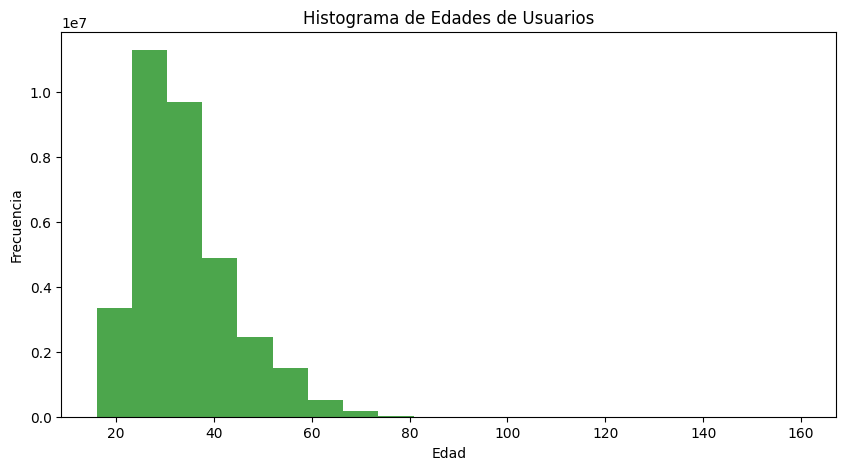

In [51]:
# Histograma de la columna 'Edad_Usuario'
plt.figure(figsize=(10, 5))
plt.hist(df_viajes['Edad_Usuario'], bins=20, color='green', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades de Usuarios')
plt.show()

In [52]:
df_viajes['Edad_Usuario'].describe(percentiles=np.arange(0,1.01,.1))

count   33893476.000
mean          33.917
std            9.733
min           16.000
0%            16.000
10%           24.000
20%           26.000
30%           28.000
40%           30.000
50%           32.000
60%           34.000
70%           37.000
80%           41.000
90%           48.000
100%         160.000
max          160.000
Name: Edad_Usuario, dtype: float64

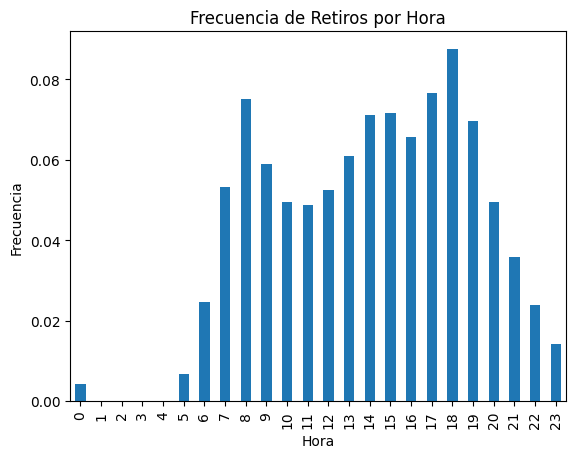

In [53]:
# df_horas = df_viajes['fh_retiro'].map( lambda fecha: fecha.hour ).value_counts(True).sort_index()
df_horas = df_viajes['fh_retiro'].map( lambda fecha: fecha.hour ).value_counts(True).reindex(range(0,24)).fillna(0)
df_horas.plot(kind='bar')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Retiros por Hora')
plt.show()

In [54]:
df_horas.reset_index()

,fh_retiro,proportion
0,0,0.004
1,1,0.000
2,2,0.000
3,3,0.000
4,4,0.000
5,5,0.007
6,6,0.025
7,7,0.053
8,8,0.075
9,9,0.059


## Gráficas

Text(0.5, 1.0, 'Frecuencia de Retiros por Hora (Muestra)')

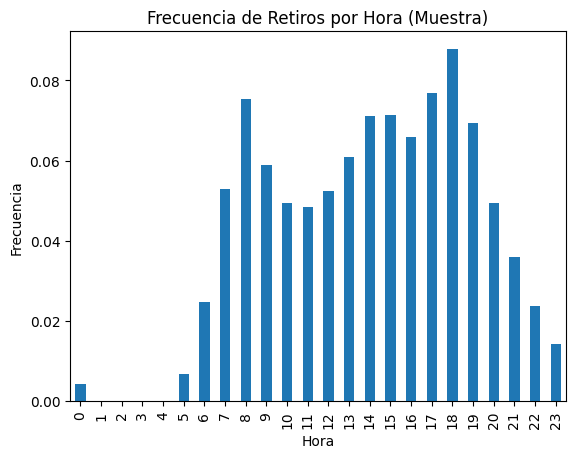

In [55]:
# Tomo el 10% de los viajes y obtengo los viajes por hora
df_horas_muestra = df_viajes['fh_retiro'] \
            .sample(frac=.1) \
            .map( lambda fecha: fecha.hour ) \
            .value_counts(True) \
            .reindex(range(0,24)) \
            .fillna(0) \
            .sort_index()
df_horas_muestra.plot(kind='bar')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Retiros por Hora (Muestra)')

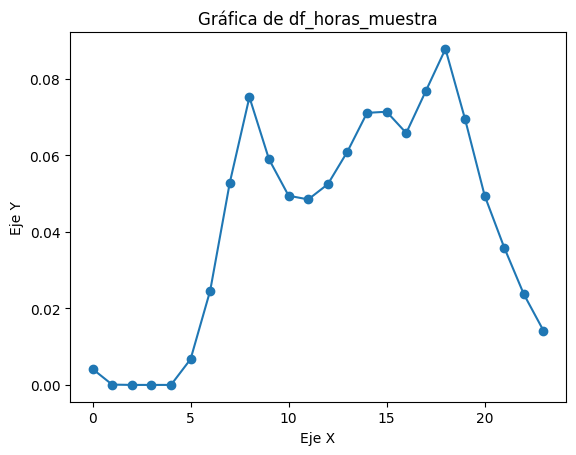

In [56]:
# Grafica de horas muestra

plt.plot(df_horas_muestra, marker='o')

# Títulos y etiquetas
plt.title('Gráfica de df_horas_muestra')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar la gráfica
plt.show()

In [57]:
import plotly.express as px

# Crear la gráfica de barras interactiva
fig = px.bar(df_horas_muestra.reset_index(), x='fh_retiro', y='proportion', title="Proporción Ecobici por hora")

# Agregar etiquetas a las barras
#fig.update_traces(text=df_horas_muestra.reset_index()['proportion'].apply( lambda x: round(x,2) ) )

fig.show()

In [58]:
# Crear la gráfica de barras interactiva
fig = px.line(df_horas_muestra.reset_index(), x='fh_retiro', y='proportion', title="Proporción Ecobici por hora")

# Agregar etiquetas a las barras
#fig.update_traces(text=df_horas_muestra.reset_index()['proportion'].apply( lambda x: round(x,2) ) )

fig.show()

In [59]:
import plotly.express as px

# Crear la gráfica de barras interactiva
fig = px.bar(df_viajes['Ciclo_Estacion_Retiro'].value_counts(), title="Proporción estacion Ecobici")

# Agregar etiquetas a las barras
#fig.update_traces(text=df_horas_muestra.reset_index()['proportion'].apply( lambda x: round(x,2) ) )

# ordeamos por la longitud de la estacion de retiro
fig.update_traces(text=df_viajes['Ciclo_Estacion_Retiro'].value_counts().sort_index() )

fig.show()

In [60]:
df_viajes.describe()

,Edad_Usuario,Bici,fh_retiro,fh_arribo
count,33893476.000,33893476.000,33893476,33893476
mean,33.917,5463998.044,2024-04-03 01:03:12.007367680,2024-04-03 01:19:20.887438336
min,16.000,2000461.000,2022-08-19 14:44:45,2023-03-01 00:00:10
25%,27.000,3722022.000,2023-11-05 14:23:12.750000128,2023-11-05 14:43:37.750000128
50%,32.000,5449988.000,2024-04-15 15:32:15,2024-04-15 15:47:39.500000
75%,39.000,7216393.000,2024-09-13 17:07:47.249999872,2024-09-13 17:23:05
max,160.000,8999708.000,2025-01-31 23:57:09,2025-01-31 23:59:57
std,9.733,2029089.129,NaN,NaN


In [61]:
df_viajes.dtypes

Genero_Usuario                   object
Edad_Usuario                      int32
Bici                              int32
Ciclo_Estacion_Retiro            object
Ciclo_EstacionArribo             object
fh_retiro                datetime64[ns]
fh_arribo                datetime64[ns]
dtype: object

In [68]:
%ls

EDA.ipynb                    IngenieriaDeVariables.ipynb
EDA_Airbnb.ipynb


In [69]:
df_viajes.to_parquet('../data/ecobici/viajes.parquet')

In [ ]:
del df_viajes
gc.collect()

## Conclusiones

* La información analizada en este Notebook fue a partir del año 2023 hasta el primer mes del 2025. No se tiene un comportamiento distinto al visto en el ejericio en clase, ya que las horas pico se siguen manteniendo (08:00 a.m. y 18:00 p.m).

* El promedio de las proporciones de las bicicletas por hora nota disminuir alrededor de un 10% con respecto al conjunto de datos realizado en clase, pero las distribuciones se siguen manteniendo de la misma forma.

* En cuanto a la proporcion de Genero de Usuario, se ha tenido un cambio, ya que se han agregado dos valores mas, en el conjunto de datos visto en clase solo se tienen genero con la etiqueta 'M' (que lo podemos interpretar como el genero Masculino) y tambien la etiqueta 'F' (en este caso representa al genero 'Femenino'). En este conjunto de datos que se analizó nos percatamos que se encuentran dos etiquetas mas: O y ?, son etiquetas que representan menos del 3% del conjunto de datos, pero son valores que se han agregado.

* Aun con estos valores que se agregaron, los registros con la etiqueta 'M' sigue predominando como el grupo mayoritario, tal como en el conjunto de datos analizado en la clase.

* La distribucion de la edad de mantiene, ya que se encuentra una mayor concentración entre los 20 y 40 años, con un promedio de 33.9%, similar al promedio obtenido en ejercicio realizado en clase.

* Como adicional, se encontraron detalles extras al realizar el analisis de los nuevos datos, uno de ellos es el nombre de las columnas, ya que al tener una variacion por un simple caracter, este afecta al analisis y procesamiento siguiente, por lo que es necesario aplicar transformaciones extras. Tambien en la variable 'Ciclo_estacion_retiro' se tienen valores concatenados, es decir, en un registro se encuentran dos ID de estaciones. Al buscar estos Id en el catalogo de estaciones, son estaciones diferentes, en este caso es necesario definir una accion para poder determinar un solo valor. No se opta por eliminar los registros, ya que el porcentaje de registros con esta carcateristica es considerable.

